In [1]:
# install required packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 


In [3]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#specify matplotlib figure sizes & kernel
%matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 20]

# add project root folder to path to allow import local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# import local modules
from helpers import load_csv

In [4]:
# load data in numpy structured array
data = load_csv("../dataset/trainset.csv")
df = pd.DataFrame(data).set_index('Id')

In [6]:
def hist_col_by_prediction(col,x_min=-1000, x_max =1000):
    df_col_1 = df.loc[df['Prediction']==1, col]
    df_col_0 = df.loc[df['Prediction']==0, col]
    kwargs = dict(alpha=0.5, bins=200)
    plt.figure(figsize=(5,2))
    plt.vlines(df_col_1.median(),0,30000)
    plt.hist(df_col_1, **kwargs, color='g', label='Signal')
    plt.hist(df_col_0, **kwargs, color='r', label='Background')
    plt.gca().set(title=col)
    plt.xlim(x_min,x_max)
    plt.legend()
    plt.show()


In [9]:
def get_numpy_from_col(col,degree):
    col0 = df.loc[df['Prediction']==0, col].to_numpy()
    col1 = df.loc[df['Prediction']==1,col].to_numpy()
    col = df[col].to_numpy()
    return col0, col1, col


## Looking at DER_mass_transverse_met_lep

<IPython.core.display.Javascript object>


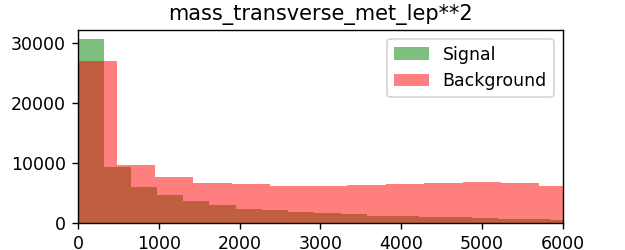

[ 8118.01      2710.555969 14360.187556 ...  6344.919025  1841.783056
  5246.829225]


In [12]:
# take look at powers
col1 = df.loc[df['Prediction']==1,'DER_mass_transverse_met_lep'].to_numpy()
col0 = df.loc[df['Prediction']==0, 'DER_mass_transverse_met_lep'].to_numpy()
col1 = np.power(col1,2)
col0 = np.power(col0,2)
kwargs = dict(alpha=0.5, bins=1000)
x_min = 0
x_max = (6000)
plt.figure(figsize=(5,2))
print(col0)
plt.hist(col1, **kwargs, color='g', label='Signal')
plt.hist(col0, **kwargs, color='r', label='Background')
plt.gca().set(title="mass_transverse_met_lep**2")
plt.xlim(x_min,x_max)
plt.legend()
plt.show()

In [18]:
col  = df['DER_mass_transverse_met_lep'].to_numpy()
y = df['Prediction'].to_numpy()
print(np.corrcoef(y,col))
cols = np.power(col,1/2)
print(np.corrcoef(y,cols))
col = np.power(col,2)
print(np.corrcoef(y,col))
disc  =  [col < 2500, col > 0]
print(np.corrcoef(y,disc))


[[ 1.         -0.35208672]
 [-0.35208672  1.        ]]
[[ 1.         -0.37090632]
 [-0.37090632  1.        ]]
[[ 1.         -0.20988188]
 [-0.20988188  1.        ]]
[[ 1.00000000e+00  3.71759374e-01  7.12656548e-05]
 [ 3.71759374e-01  1.00000000e+00 -3.43898079e-03]
 [ 7.12656548e-05 -3.43898079e-03  1.00000000e+00]]
[[ 1. nan]
 [nan nan]]
